In [53]:

from helpers import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import calplot
%matplotlib inline
plt.style.use('default')

In [54]:
df = load_data()

In [55]:
# print colums in df which contain NaN
df.columns[df.isna().any()].to_list()

['sm_mean', 'sm_var']

In [56]:
# Check if both are missing at the same time
print((df.station[df.sm_mean.isna()] == df.station[df.sm_var.isna()]).all())

True


In [57]:
# Which stations are missing data?
stations_missing_data = df.station[df.sm_mean.isna()].to_numpy()

stations_missing_data, counts = np.unique(stations_missing_data, return_counts=True)

Text(0.5, 1.0, 'Number of missing data points for each station')

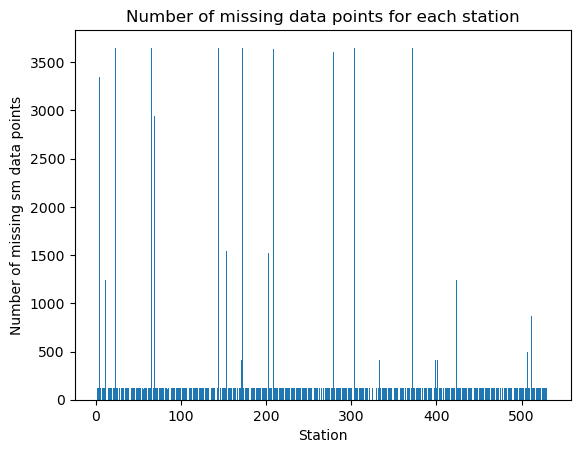

In [58]:
plt.bar(x=stations_missing_data, height=counts)
plt.xlabel("Station")
plt.ylabel("Number of missing sm data points")
plt.title("Number of missing data points for each station")

In [25]:
dates_missing_df = df[df['sm_mean'].isnull()].groupby('station')['date'].apply(list).reset_index(name='missing_dates')

missing_121 = dates_missing_df[counts == 121]

In [26]:
# Does every stations which has 121 missing days have the same missing days?
all(missing_121['missing_dates'][0] == x for x in missing_121['missing_dates'])

True

In [27]:
# what dates are missing in the data?
missing_121['missing_dates'][0]

[Timestamp('2014-03-06 00:00:00+0000', tz='UTC'),
 Timestamp('2014-03-07 00:00:00+0000', tz='UTC'),
 Timestamp('2014-03-08 00:00:00+0000', tz='UTC'),
 Timestamp('2014-03-09 00:00:00+0000', tz='UTC'),
 Timestamp('2014-03-10 00:00:00+0000', tz='UTC'),
 Timestamp('2014-03-11 00:00:00+0000', tz='UTC'),
 Timestamp('2014-03-12 00:00:00+0000', tz='UTC'),
 Timestamp('2014-03-13 00:00:00+0000', tz='UTC'),
 Timestamp('2014-03-14 00:00:00+0000', tz='UTC'),
 Timestamp('2014-03-15 00:00:00+0000', tz='UTC'),
 Timestamp('2014-03-16 00:00:00+0000', tz='UTC'),
 Timestamp('2014-03-17 00:00:00+0000', tz='UTC'),
 Timestamp('2014-03-18 00:00:00+0000', tz='UTC'),
 Timestamp('2014-03-19 00:00:00+0000', tz='UTC'),
 Timestamp('2014-03-20 00:00:00+0000', tz='UTC'),
 Timestamp('2014-03-21 00:00:00+0000', tz='UTC'),
 Timestamp('2014-03-22 00:00:00+0000', tz='UTC'),
 Timestamp('2014-03-23 00:00:00+0000', tz='UTC'),
 Timestamp('2014-03-24 00:00:00+0000', tz='UTC'),
 Timestamp('2014-03-25 00:00:00+0000', tz='UTC'),


In [50]:
# How often is sm missing?
stations = load_stations(df)
stations = pd.merge(stations, dates_missing_df, how="left", on="station")
stations["Number of missing sm datapoints"] = stations.missing_dates.apply(lambda x: 0 if isinstance(x, float) else len(x))

# how many observations does each station have?
stations_no_obs = df.station.to_numpy()
stations_missing_data, counts = np.unique(stations_no_obs, return_counts=True)
stations["obs_count"] = counts

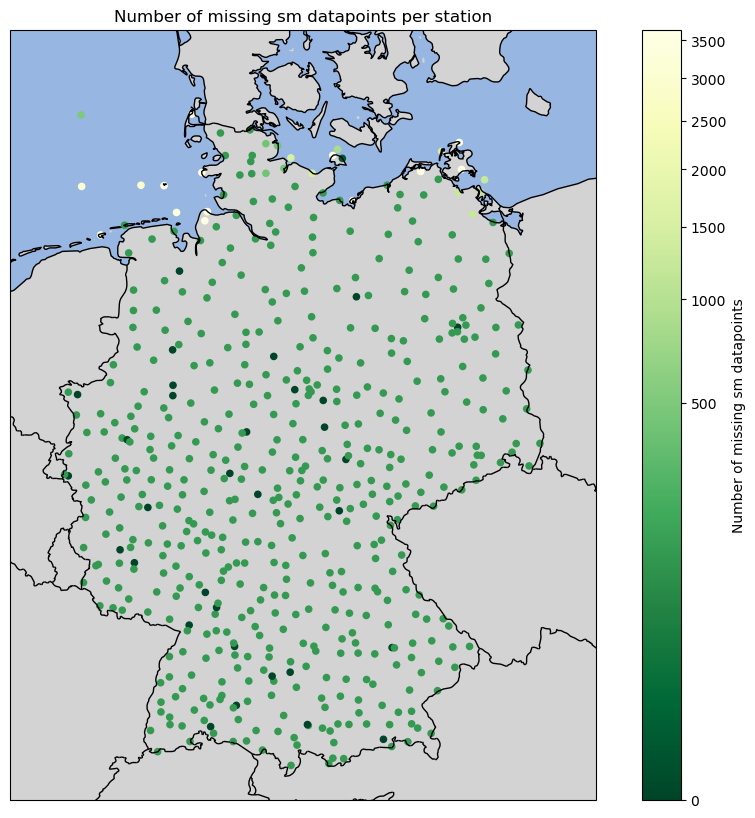

In [51]:
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1, 1, 1, projection=proj)

ax.coastlines()
ax.set_extent([5, 16, 47, 56], crs=proj)
ax.add_feature(cfeature.LAND, color="lightgrey")
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.OCEAN)


stations.plot(x="lon", y="lat", kind="scatter", c="Number of missing sm datapoints", cmap="YlGn_r", title=f"Number of missing sm datapoints per station", ax=ax, norm=mcolors.PowerNorm(1/3))


# Fix the aspect ratio of the map
lat_center = (ax.get_extent()[2] + ax.get_extent()[3]) / 2
ax.set_aspect(1 / np.cos(np.radians(lat_center)))

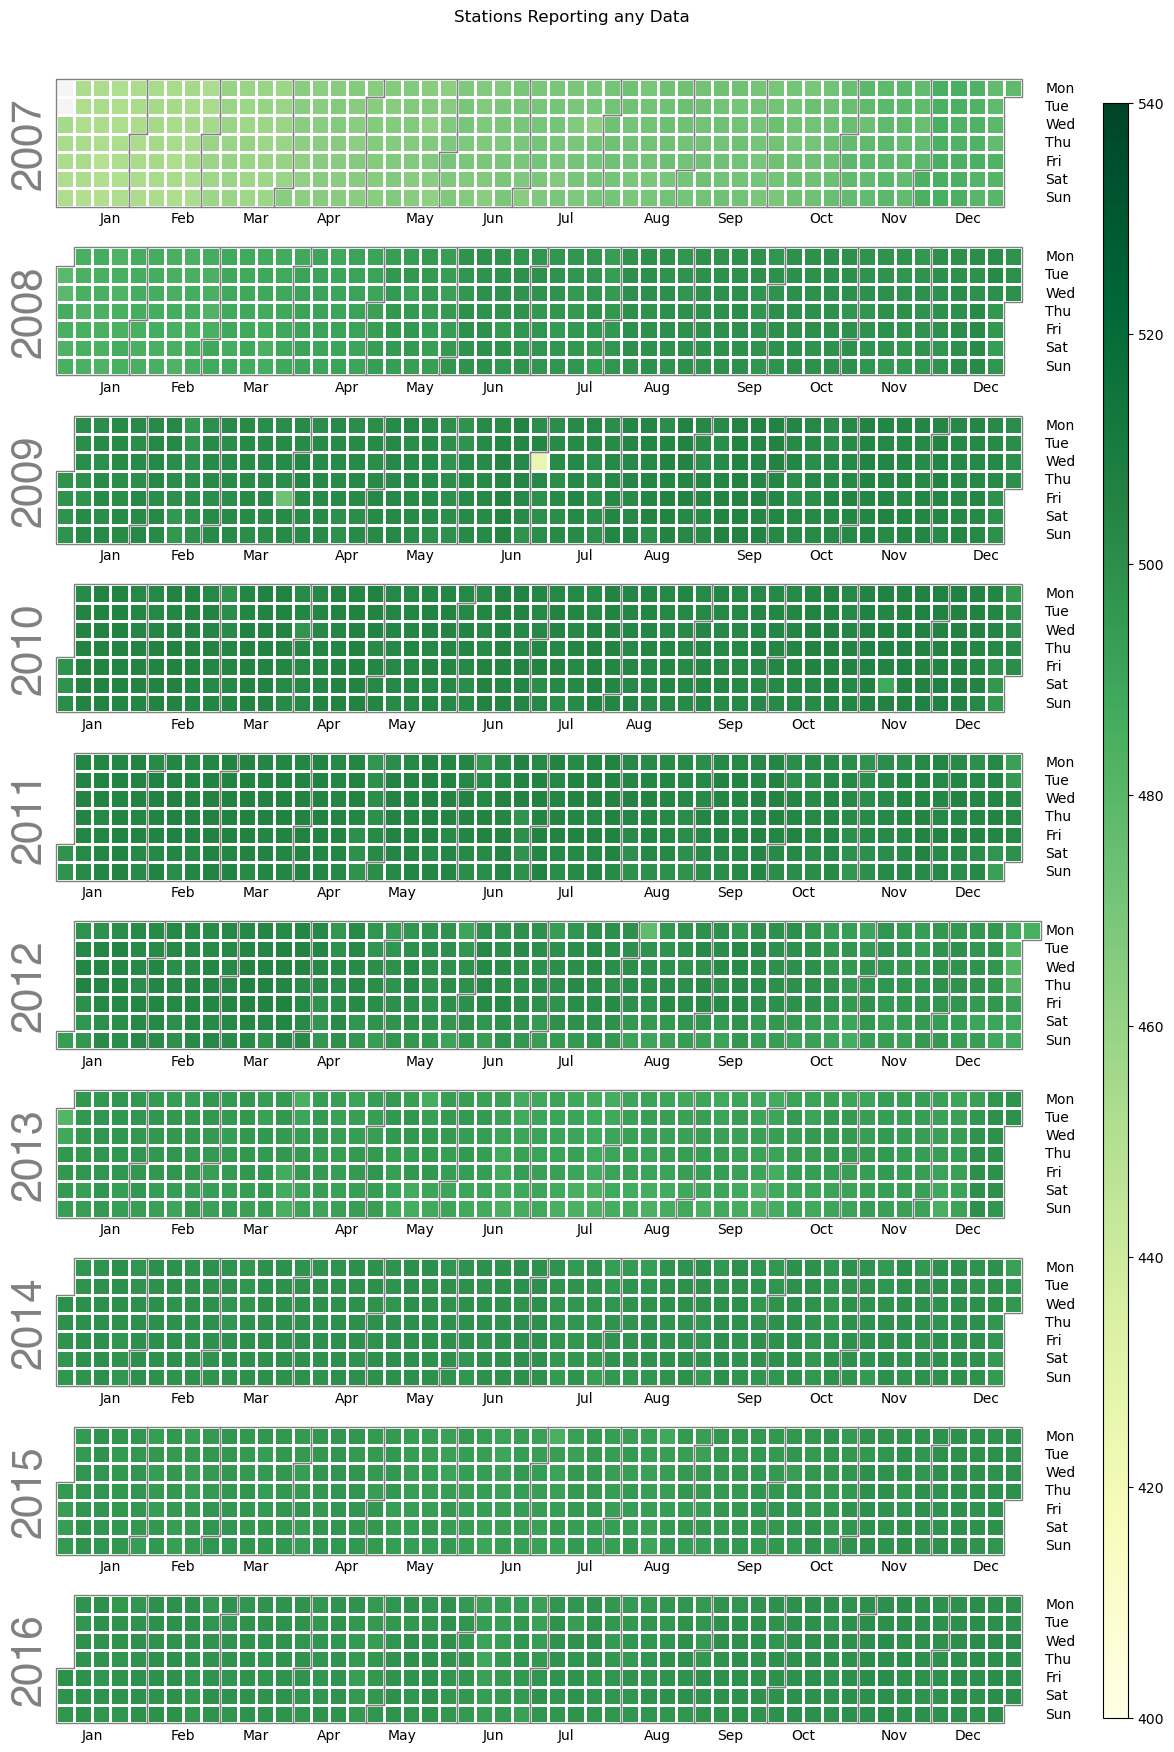

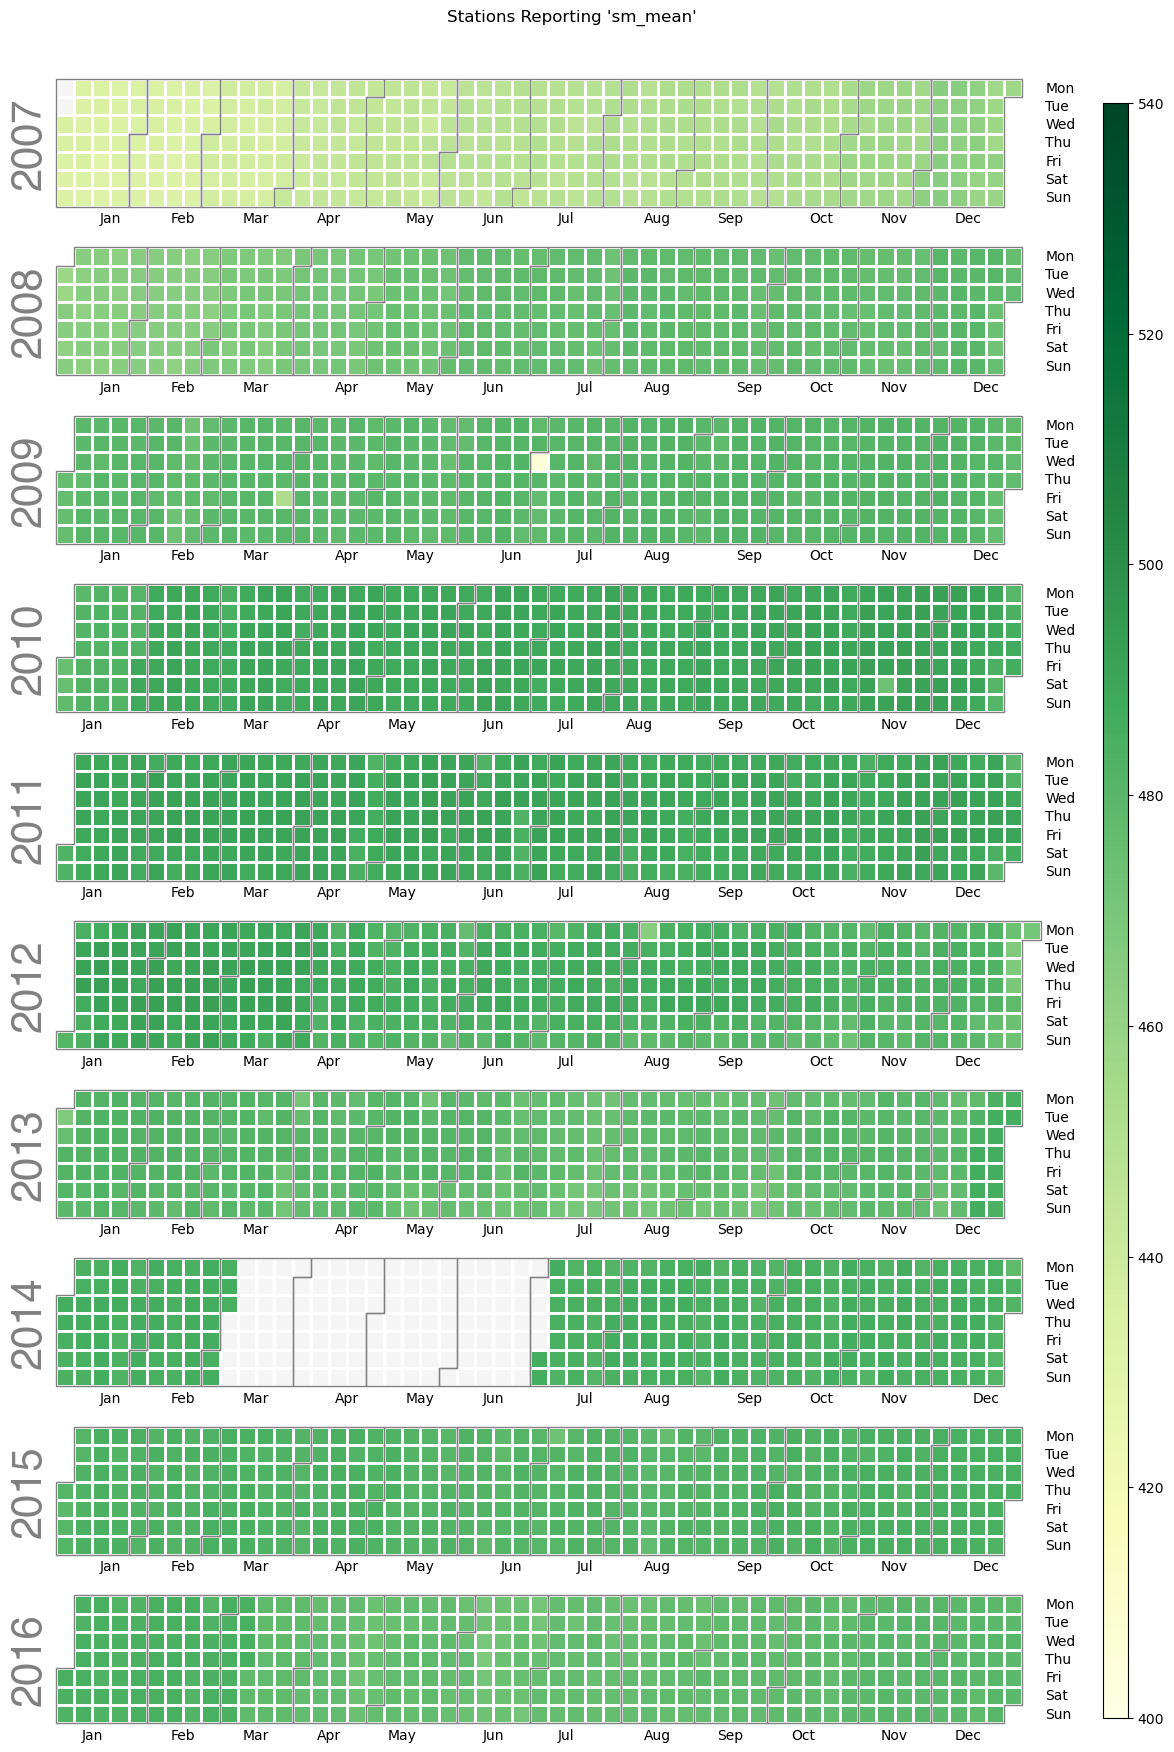

In [30]:
calplot.calplot(df["station"], how="count", dropzero=True, cmap="YlGn", suptitle="Stations Reporting any Data", vmin=400, vmax=540)
calplot.calplot(df["sm_mean"], how="count", dropzero=True, cmap="YlGn", suptitle="Stations Reporting 'sm_mean'", vmin=400, vmax=540)

In [31]:
df = df.reset_index(drop=True)
df_count = df.groupby('date').count()
df_count.index = df_count.index.tz_convert(None)
df_count["percentage"] = df_count['sm_mean']/df_count['station']

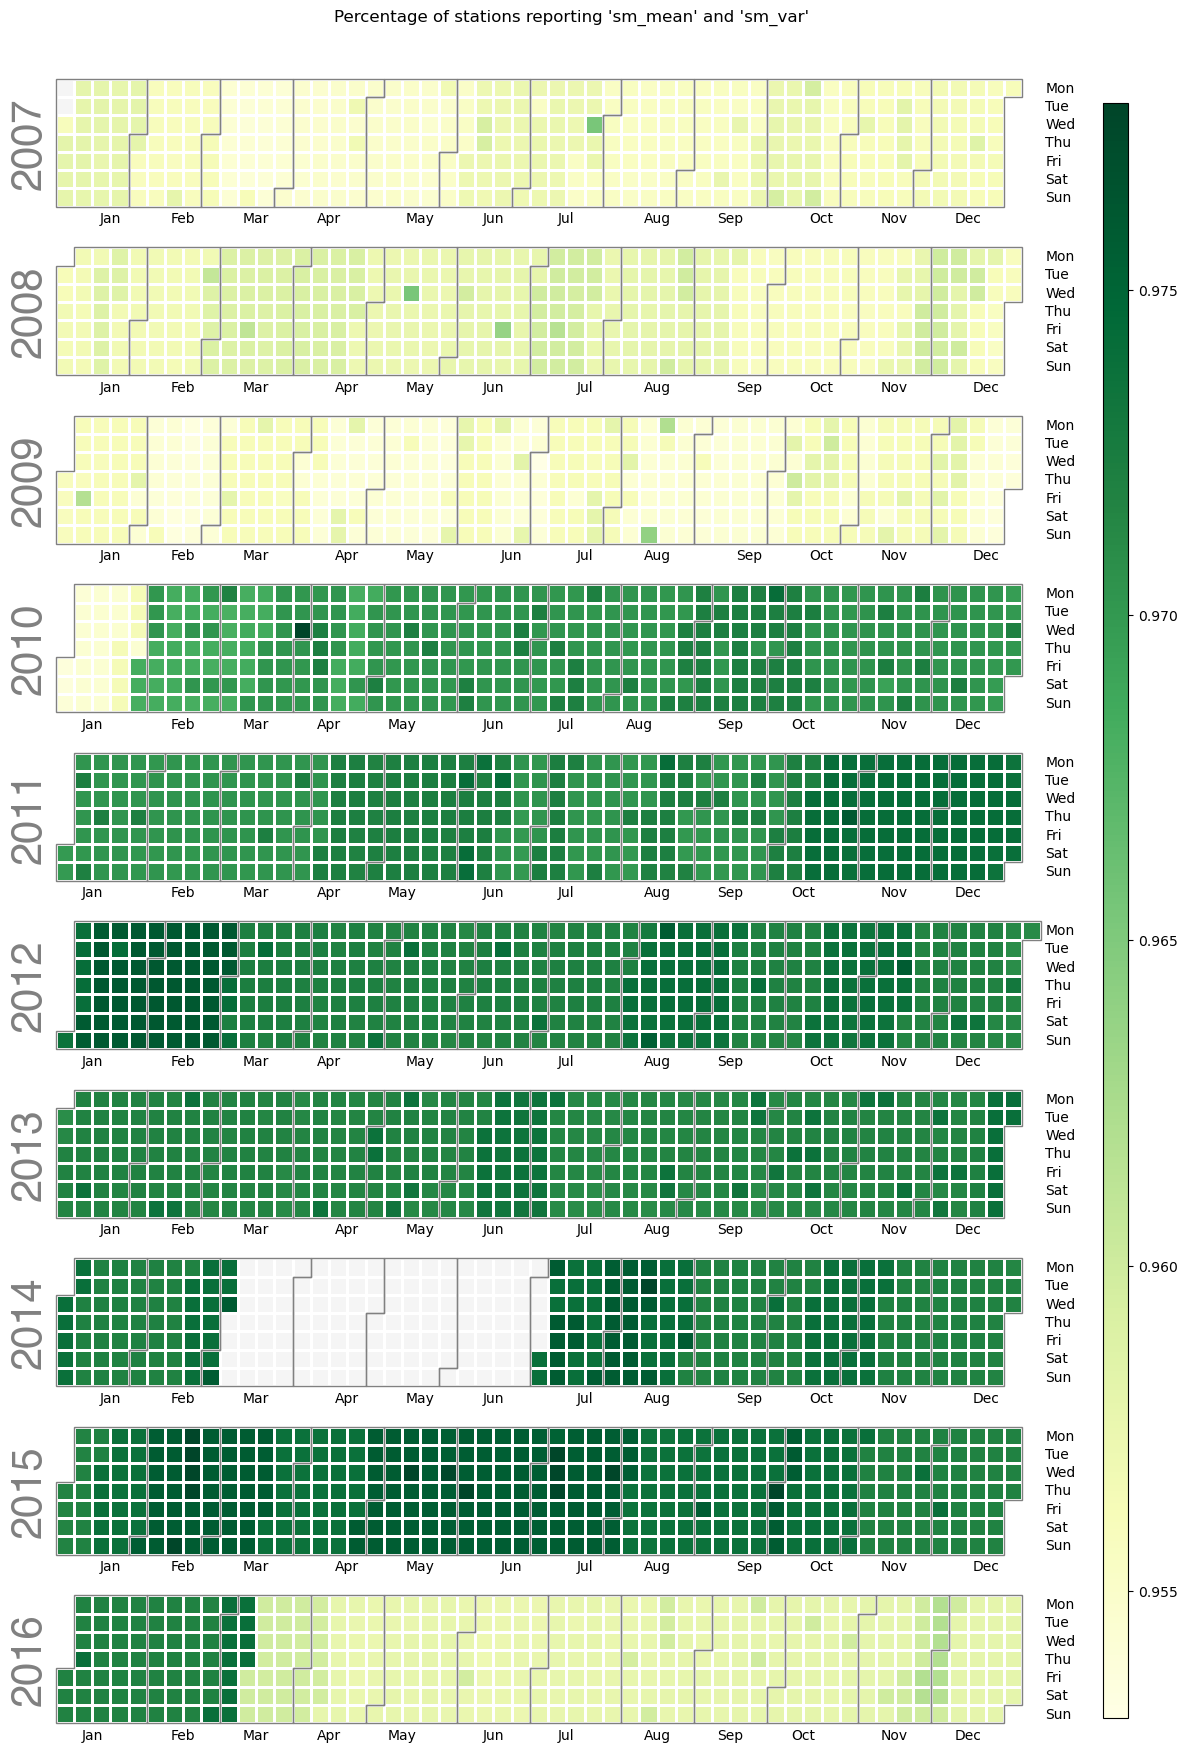

In [32]:
calplot.calplot(df_count['percentage'], suptitle=f"Percentage of stations reporting 'sm_mean' and 'sm_var'", cmap="YlGn" ,dropzero=True)